# Effects of Trip Characteristics on Their Duration

## Investigation Overview

In this investigation, I wanted to look at the characteristics of trips that could be used to predict their duration. The main focus was on the distance, member age, start day of the week, start hour, type of user, and gender.

## Dataset Overview

The data consisted of duration and attributes of approximately 183,412 trips in San Francisco Bay Area, California. The attributes included the distance, member age, start day of the week, start hour, type of user, and gender. There were some quality and tidiness issues in the dataset and they were fixed. Also, there were some outliers related to duration, distance, and member age discovered during the exploratory phase and they were removed from the dataset to safety reasons.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the cleaned dataset into a pandas dataframe
fordgobike_rides_clean = pd.read_csv('fordgobike_master.csv')

In [3]:
# convert start_month, and start_day_of_week into ordered categorical types
ordinal_var_dict = {'start_month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                    'start_day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordgobike_rides_clean[var] = fordgobike_rides_clean[var].astype(ordered_var)

In [ ]:
default_color = sns.color_palette()[0]

## Distribution of Trip Duration

Trip duration in the dataset take on a very large range of values, from around 10 minutes at the lowest, to around 53 minutes at the highest. Plotted on a logarithmic scale, the distribution of trip duration takes on a unimodal shape, with the highest peak around 10 minutes.

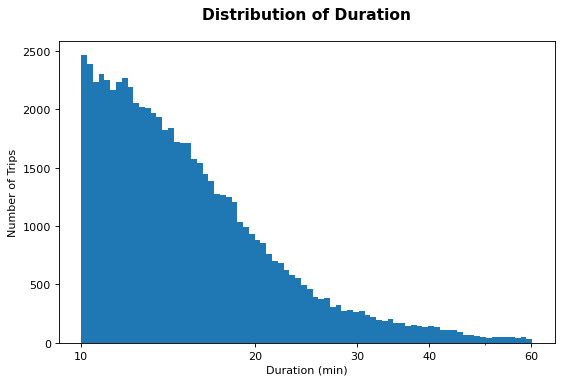

In [12]:
log_binsize = 0.01
bins = 10 ** np.arange(1, np.log10(fordgobike_rides_clean['duration_minute'].max())+log_binsize, log_binsize)

fig=plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')

plt.hist(data=fordgobike_rides_clean, x='duration_minute', bins=bins, color = default_color);
plt.xscale('log')
plt.xticks([1e1, 2e1, 3e1, 4e1, 6e1], [10, 20, 30, 40, 60])
plt.xlabel('Duration (min)');
plt.ylabel('Number of Trips')
plt.title('Distribution of Duration', y=1.05, fontsize=14, fontweight='bold', color = 'black');

## Distribution of Trip Distance

The distribution of trip distance is right skewed and it has unimodal shape, being the most frequent distance between 1 and 2 kilometers.

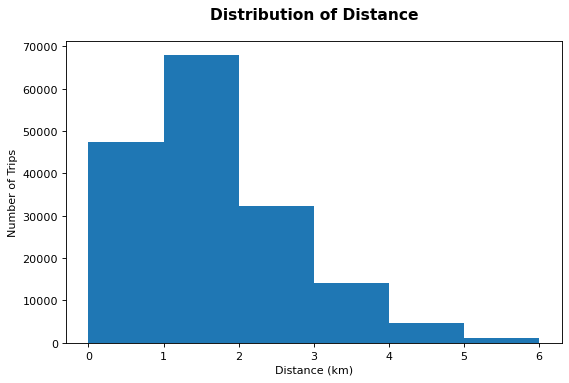

In [13]:
fig=plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
binsize = 0.05
bins = np.arange(0, fordgobike_rides_clean['distance'].max()+binsize, binsize)


bins = np.arange(0, 7, 1)
plt.hist(data=fordgobike_rides_clean, x='distance', bins=bins, color = default_color);
plt.xlabel('Distance (km)');
plt.ylabel('Number of Trips')
plt.title('Distribution of Distance', y=1.05, fontsize=14, fontweight='bold', color = 'black');

## Distribution of Member Age

The distribution of member age is right skewed and it has unimodal shape. The most frequent range of member age is between 25 and 45 years old.

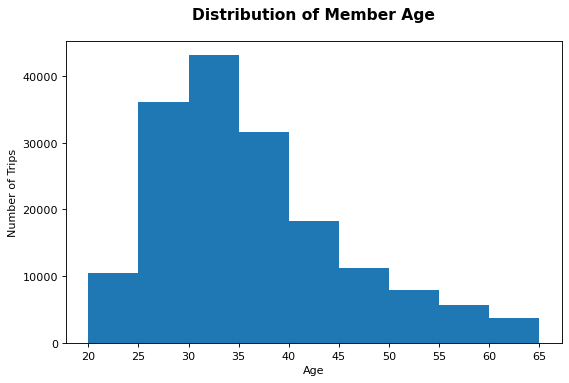

In [14]:
fig=plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
binsize = 5
bins = np.arange(fordgobike_rides_clean['member_age'].min(), fordgobike_rides_clean['member_age'].max()+binsize, binsize)

plt.hist(data=fordgobike_rides_clean, x='member_age', bins=bins, color = default_color);
plt.xticks(bins);
plt.xlabel('Age');
plt.ylabel('Number of Trips')
plt.title('Distribution of Member Age', y=1.05, fontsize=14, fontweight='bold', color = 'black');

## Proportions of User Type and Member Gender

Around 90% of the users are Subscriber and less than 10% are Customer. On the other hand, the majority of the users, around 75%, are Male  and around 24% of users are Female. Only 1% are Other gender.

In [7]:
def plot_proportions_of_user_type_and_gender():
    fig, ax = plt.subplots(nrows=2, figsize = [8,6])

    user_type_counts = fordgobike_rides_clean['user_type'].value_counts()
    user_type_order = user_type_counts.index
    n_user_type = user_type_counts.sum()
    max_user_type_count = user_type_counts[0]
    max_user_type_prop = max_user_type_count / n_user_type
    user_type_tick_props = np.arange(0, max_user_type_prop+0.1, 0.1)
    user_type_tick_names = ['{:0.2f}'.format(v) for v in user_type_tick_props]

    sns.countplot(data = fordgobike_rides_clean, y = 'user_type', color = default_color, order=user_type_order, ax = ax[0])
    plt.sca(ax[0])
    plt.xticks(user_type_tick_props * n_user_type, user_type_tick_names)
    plt.ylabel('User Type')
    plt.xlabel('Proportion')

    member_gender_counts = fordgobike_rides_clean['member_gender'].value_counts()
    member_gender_order = member_gender_counts.index
    n_member_gender = member_gender_counts.sum()
    max_member_gender_count = member_gender_counts[0]
    max_member_gender_prop = max_member_gender_count / n_member_gender
    member_gender_tick_props = np.arange(0, max_member_gender_prop+0.05, 0.05)
    member_gender_tick_names = ['{:0.2f}'.format(v) for v in member_gender_tick_props]

    sns.countplot(data = fordgobike_rides_clean, y = 'member_gender', color = default_color, order=member_gender_order, ax = ax[1])
    plt.sca(ax[1])
    plt.xticks(member_gender_tick_props * n_member_gender, member_gender_tick_names)
    plt.ylabel('Member Gender')
    plt.xlabel('Proportion')

    fig.suptitle('User Type and Member Gender Proportions', size=14)
    plt.show();

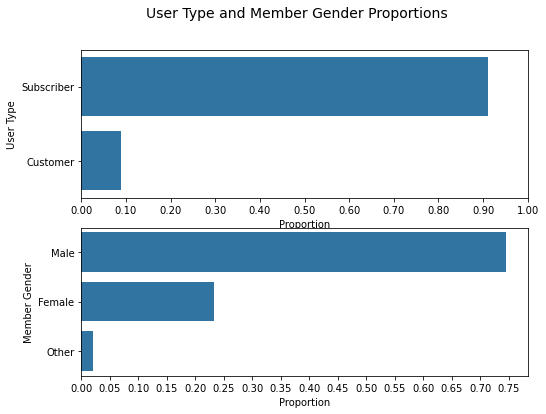

In [10]:
plot_proportions_of_user_type_and_gender()

## Duration vs. Distance

This plot suggests that there is a positive correlation between the trip duration and the trip distance. As the trip duration increases the trip distance will increase too.

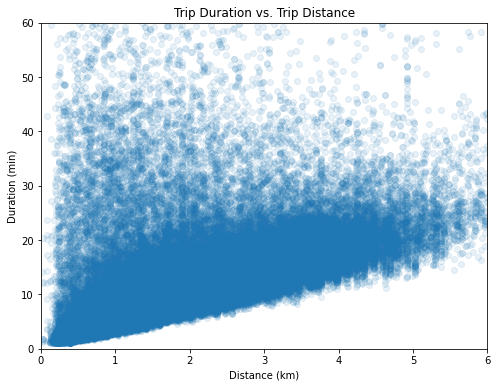

In [15]:
plt.figure(figsize = [8, 6])
plt.scatter(data = fordgobike_rides_clean, x = 'distance', y = 'duration_minute', alpha = 1/10, color = default_color)
plt.title('Trip Duration vs. Trip Distance')

plt.ylim([0, 60])
plt.xlim([0, 6])

plt.xlabel('Distance (km)')
plt.ylabel('Duration (min)')
plt.show()

## Trip Duration and Distance by User Type

There is an interaction effect visible between duration, distance, and the member categorical features: user_type, and member_gender. This is most evident for the user type. Subscribers made shorter trips than customers in terms on duration and distance.

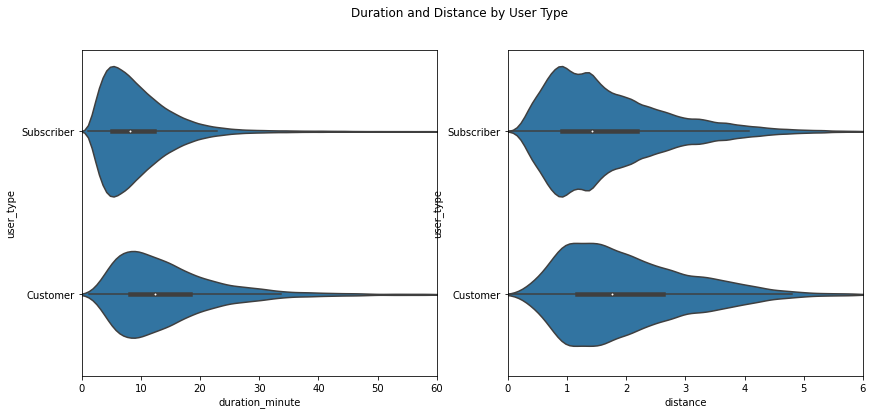

In [19]:
fig, ax = plt.subplots(ncols = 2, figsize = [14,6])
sns.violinplot(data = fordgobike_rides_clean, y = 'user_type', x = 'duration_minute', ax = ax[0], color = default_color)
ax[0].set_xlim([0, 60])

sns.violinplot(data = fordgobike_rides_clean, y = 'user_type', x = 'distance', ax = ax[1],
               color = default_color)
ax[1].set_xlim([0, 6])
fig.suptitle('Duration and Distance by User Type')
plt.show()

## Trip Duration by User Type and Start Day of Week

Subscribers have a similar duration through all weekdays. Customers made larger trips in terms on duration than subscribers, this difference is specially higher over the weekends.

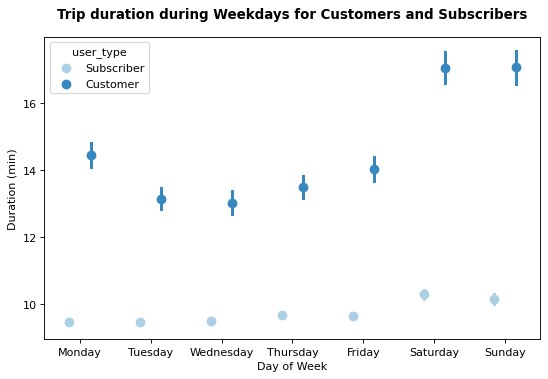

In [16]:
fig=plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Trip duration during Weekdays for Customers and Subscribers", y = 1.04,fontweight='bold', color = 'black')

sns.pointplot(data=fordgobike_rides_clean, x='start_day_of_week', y='duration_minute', hue='user_type', dodge=0.3, linestyles="", palette = 'Blues');
plt.xlabel('Day of Week');
plt.ylabel('Duration (min)');

## Hourly Usage by User Type and Start Day of Week

Susbcribers use the service mainly for commuting to work. The majority of their trips are made at 8am and at 5pm which correspond with office hours. There are some customers that use the service for commuting as well. The amount of subscribers that use the service over the weekend is higher than the customer who use the service on weekends. However, the great majority of the customers use the service over the weekend.

In [17]:
def plot_hourly_usage_by_user_type_and_weekdays():
    #adjusting the size
    fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')

    #title
    plt.suptitle("Hourly Usage during Weekdays for Customers and Subscribers", y = 1.04,fontweight='bold', color = 'black')
    #subplot1
    plt.subplot(2, 1, 1)
    subscribers = fordgobike_rides_clean.query('user_type == "Subscriber"')
    st_counts = subscribers.groupby(['start_day_of_week', 'start_hour']).size()
    st_counts = st_counts.reset_index(name='count')
    st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour', values='count')
    sns.heatmap(st_counts, cmap='mako_r');
    plt.title('Subscriber', loc='left');
    plt.xlabel('Hour of Day');
    plt.ylabel('Day of Week');


    #subplot2
    plt.subplot(2, 1, 2)
    customers = fordgobike_rides_clean.query('user_type == "Customer"')
    ct_counts = customers.groupby(['start_day_of_week', 'start_hour']).size()
    ct_counts = ct_counts.reset_index(name='count')
    ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour', values='count')
    sns.heatmap(ct_counts, cmap='mako_r');
    plt.title('Customer', loc='left');
    plt.xlabel('Hour of Day');
    plt.ylabel('Day of Week');
    plt.show();

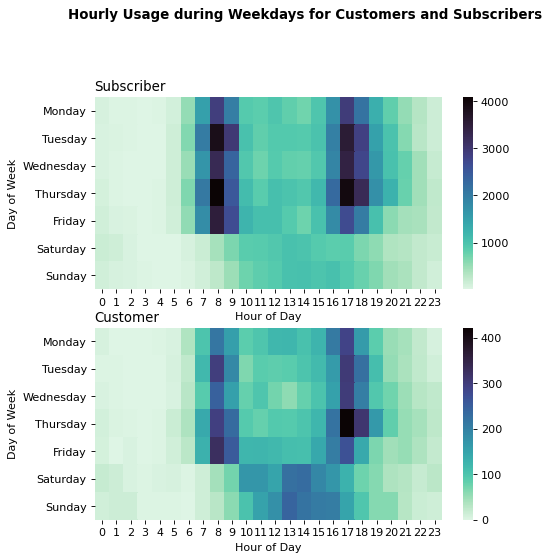

In [18]:
plot_hourly_usage_by_user_type_and_weekdays()